# Setup for the data and Libraries

In [1]:
#importing Libraries from Preprocessing and data plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import random as rand
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import seaborn as sns

2023-02-08 17:26:27.880876: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-08 17:26:27.880916: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-08 17:26:28.932965: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-08 17:26:28.933095: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-08 17:26:28.933111: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
#reading data from cvs
df = pd.read_csv("ultimate_data.csv").drop("Unnamed: 0", axis=1)
df.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,piped into dwelling,NaN,NaN
1,piped into dwelling,NaN,NaN
2,piped into dwelling,NaN,NaN
3,piped into dwelling,NaN,NaN
4,piped into dwelling,NaN,NaN


In [3]:
#spliltiing missing data and entrrying random values to the newly created data frame(only missing values)
Train = pd.DataFrame()
dumy, df = df.dropna(), df
temp = dumy
df["time to get to water source (minutes)"].fillna(-1, inplace=True)
for col in df.columns:
    df.fillna("?", inplace=True)
    val = dumy[col].unique()
    Train[col] = [rand.choice(val) if(i=="?" or i==-1) else i for i in df[col]]
Train.shape, df.shape

((970636, 3), (970636, 3))

# Data Preprocessing

In [4]:
df.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,piped into dwelling,-1.0,?
1,piped into dwelling,-1.0,?
2,piped into dwelling,-1.0,?
3,piped into dwelling,-1.0,?
4,piped into dwelling,-1.0,?


In [5]:
Train.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,piped into dwelling,56.0,elsewhere
1,piped into dwelling,145.0,in own dwelling
2,piped into dwelling,15.0,in own yard/plot
3,piped into dwelling,402.0,in own yard/plot
4,piped into dwelling,128.0,in own dwelling


In [6]:
#encoding Data into labels by Label encoder from sklearn
lb = LabelEncoder()
temp = temp.dropna()
Temp = []
for i in df.columns:
    if i == "time to get to water source (minutes)":
        continue
    Temp.extend(temp[i].unique())
Temp.append("?")
lb.fit(Temp)
for i in df.columns:
    if i == "time to get to water source (minutes)":
        continue
    df[i] = lb.transform(df[i])
    Train[i] = lb.transform(Train[i])

In [7]:
df.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,7,-1.0,0
1,7,-1.0,0
2,7,-1.0,0
3,7,-1.0,0
4,7,-1.0,0


In [8]:
Train.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,7,56.0,3
1,7,145.0,4
2,7,15.0,5
3,7,402.0,5
4,7,128.0,4


# Modeling and Learning

In [9]:
#creating a simple multilayered auto-encoder model
model = Sequential()

model.add(Dense(256, activation="relu", input_shape=(3,)))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(3, activation="relu"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1024      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 


2023-02-08 17:26:34.056552: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-02-08 17:26:34.056598: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Hassan-Ibrar): /proc/driver/nvidia/version does not exist


 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 3)                 771       
                                                                 
Total params: 89,555
Trainable params: 89,555
Non-trainable params: 0
_________________________________________________________________


In [10]:
#compiling model(adding hyperparameters)
model.compile(loss="MSE", optimizer="adam", metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(np.array(df),np.array(Train), epochs=10)

Epoch 1/10
30333/30333 [==============================] - 116s 4ms/step - loss: 1685.1970 - root_mean_squared_error: 41.0511
Epoch 2/10
30333/30333 [==============================] - 114s 4ms/step - loss: 1253.3047 - root_mean_squared_error: 35.4020
Epoch 3/10
30333/30333 [==============================] - 113s 4ms/step - loss: 1239.0391 - root_mean_squared_error: 35.2000
Epoch 4/10
30333/30333 [==============================] - 113s 4ms/step - loss: 1232.5419 - root_mean_squared_error: 35.1075
Epoch 5/10
30333/30333 [==============================] - 114s 4ms/step - loss: 1231.1885 - root_mean_squared_error: 35.0884
Epoch 6/10
30333/30333 [==============================] - 114s 4ms/step - loss: 1231.2668 - root_mean_squared_error: 35.0894
Epoch 7/10
30333/30333 [==============================] - 115s 4ms/step - loss: 1230.7301 - root_mean_squared_error: 35.0818
Epoch 8/10
30333/30333 [==============================] - 115s 4ms/step - loss: 1230.7821 - root_mean_squared_error: 35.0824


# Result

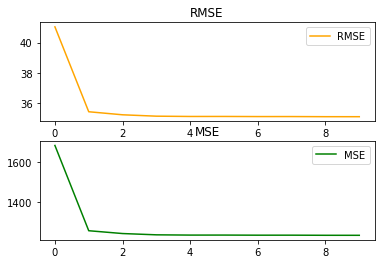

In [11]:
#printing loss graph
plt.subplot(2,1,1)
plt.plot(history.history["root_mean_squared_error"], color='orange')
plt.legend(["RMSE"])
plt.title("RMSE")
plt.subplot(2,1,2)
plt.plot(history.history["loss"], color='green')
plt.legend(["MSE"])
plt.title("MSE")
plt.show()

In [12]:
#predicting data from missing dataframe
pre = model.predict(np.array(df))

30333/30333 [==============================] - 93s 3ms/step


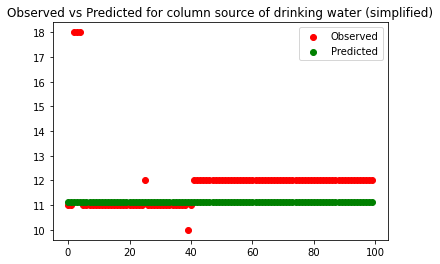

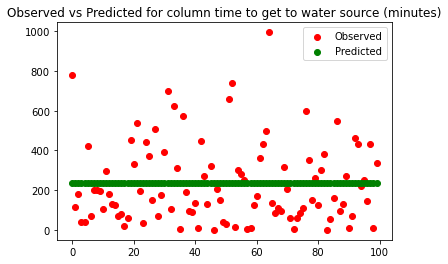

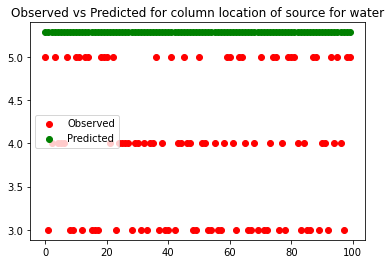

In [13]:
#plotting real vs predicted values
j=0
for col in df.columns:
    plt.scatter([i for i in range(100)], np.array(Train[col])[400:500], color="red")
    plt.scatter([i for i in range(100)], [i[j]*1.5 if j==2 else i[j] for i in pre[400:500]], color="green")
    plt.legend(["Observed", "Predicted", "Observed_reg", "Predicted_reg"])
    plt.title(f"Observed vs Predicted for column {col}")
    plt.show()
    j+=1

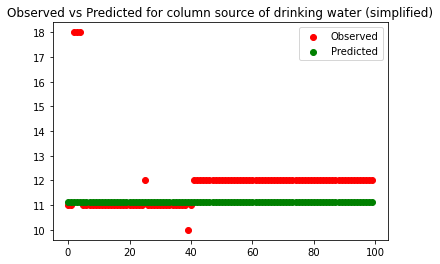

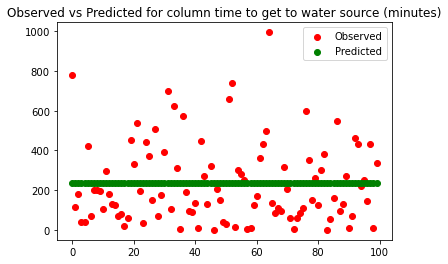

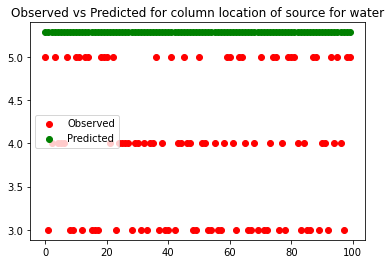

In [15]:
j=0
for col in df.columns:
    plt.scatter([i for i in range(100)], np.array(Train[col])[400:500], color="red")
    plt.scatter([i for i in range(100)], [i[j]*1.5 if j==2 else i[j] for i in pre[400:500]], color="green")
    plt.legend(["Observed", "Predicted", "Observed_reg", "Predicted_reg"])
    plt.title(f"Observed vs Predicted for column {col}")
    plt.show()
    j+=1

In [31]:
c1 = []
c2 = []
c3 = []
result = Train
for i in pre:
    c1.append(int(round(i[0], 0)))
    c2.append(round(i[1], 0))
    c3.append(int(round(i[2], 0)))
result["time to get to water source (minutes)"] = c2
min_v = min(Train["source of drinking water (simplified)"])
max_v = max(Train["source of drinking water (simplified)"])
temp = []
for i in c1:
    i = float(i)
    if i>max_v:
        i = max_v
    elif i<min_v:
        i = min_v
    else:
        i = int(round(i, 0))
    temp.append(lb.inverse_transform([i])[0])
result["source of drinking water (simplified)"] = temp
min_v = min(Train["location of source for water"])
max_v = max(Train["location of source for water"])
temp = []
for i in c3:
    i = float(i)
    if i>max_v:
        i = max_v
    elif i<min_v:
        i = min_v
    i = int(round(i, 0))
    temp.append(lb.inverse_transform([i])[0])
result["location of source for water"] = temp
result.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,protected well,235.0,in own dwelling
1,protected well,235.0,in own dwelling
2,protected well,235.0,in own dwelling
3,protected well,235.0,in own dwelling
4,protected well,235.0,in own dwelling


# Checking the accuracy of the model by giving missing values

In [37]:
#reading data from cvs
df = pd.read_csv("ultimate_data.csv").drop("Unnamed: 0", axis=1)
df.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,piped into dwelling,NaN,NaN
1,piped into dwelling,NaN,NaN
2,piped into dwelling,NaN,NaN
3,piped into dwelling,NaN,NaN
4,piped into dwelling,NaN,NaN


In [38]:
#spliltiing missing data and entrrying random values to the newly created data frame(only missing values)
Train = pd.DataFrame()
dumy, df = df.dropna(), df
temp = dumy
df["time to get to water source (minutes)"].fillna(-1, inplace=True)
for col in df.columns:
    df.fillna("?", inplace=True)
    val = dumy[col].unique()
    Train[col] = [rand.choice(val) if(i=="?" or i==-1) else i for i in df[col]]
Train.shape, df.shape

((970636, 3), (970636, 3))

In [39]:
#encoding Data into labels by Label encoder from sklearn
lb = LabelEncoder()
temp = temp.dropna()
Temp = []
for i in df.columns:
    if i == "time to get to water source (minutes)":
        continue
    Temp.extend(temp[i].unique())
Temp.append("?")
lb.fit(Temp)
for i in df.columns:
    if i == "time to get to water source (minutes)":
        continue
    df[i] = lb.transform(df[i])
    Train[i] = lb.transform(Train[i])

In [40]:
history = model.fit(np.array(Train),np.array(Train), epochs=10)

Epoch 1/10
30333/30333 [==============================] - 118s 4ms/step - loss: 0.6293 - root_mean_squared_error: 0.7933
Epoch 2/10
30333/30333 [==============================] - 115s 4ms/step - loss: 0.5469 - root_mean_squared_error: 0.7395
Epoch 3/10
30333/30333 [==============================] - 115s 4ms/step - loss: 0.5209 - root_mean_squared_error: 0.7217
Epoch 4/10
30333/30333 [==============================] - 116s 4ms/step - loss: 0.4659 - root_mean_squared_error: 0.6825
Epoch 5/10
30333/30333 [==============================] - 118s 4ms/step - loss: 0.4753 - root_mean_squared_error: 0.6894
Epoch 6/10
30333/30333 [==============================] - 118s 4ms/step - loss: 0.4627 - root_mean_squared_error: 0.6802
Epoch 7/10
30333/30333 [==============================] - 119s 4ms/step - loss: 0.3629 - root_mean_squared_error: 0.6024
Epoch 8/10
30333/30333 [==============================] - 119s 4ms/step - loss: 0.5405 - root_mean_squared_error: 0.7352
Epoch 9/10
30333/30333 [========

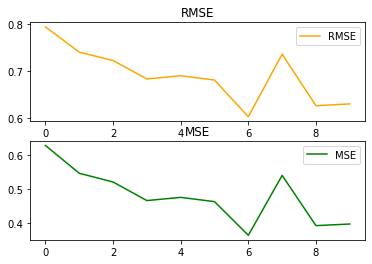

In [41]:
plt.subplot(2,1,1)
plt.plot(history.history["root_mean_squared_error"], color='orange')
plt.legend(["RMSE"])
plt.title("RMSE")
plt.subplot(2,1,2)
plt.plot(history.history["loss"], color='green')
plt.legend(["MSE"])
plt.title("MSE")
plt.show()

In [42]:
pre = model.predict(np.array(Train))

30333/30333 [==============================] - 92s 3ms/step


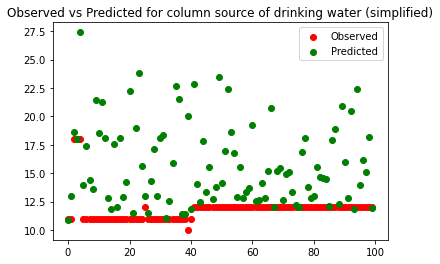

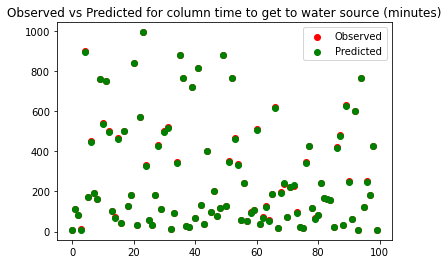

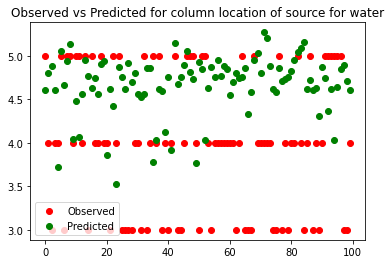

In [44]:
j=0
for col in df.columns:
    plt.scatter([i for i in range(100)], np.array(Train[col])[400:500], color="red")
    plt.scatter([i for i in range(100)], [i[j]*1.5 if j==2 else i[j] for i in pre[400:500]], color="green")
    #sns.regplot([i for i in range(100)], np.array(Train[col])[400:500], line_kws={'color':'orange'})
    #sns.regplot([i for i in range(100)], [i[j] for i in pre[400:500]], line_kws={'color':'blue'})
    plt.legend(["Observed", "Predicted", "Observed_reg", "Predicted_reg"])
    plt.title(f"Observed vs Predicted for column {col}")
    plt.show()
    j+=1

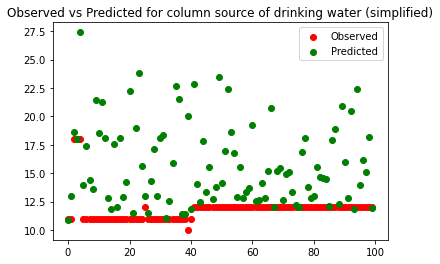

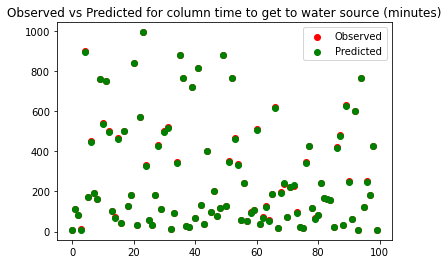

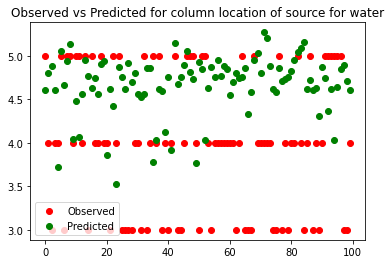

In [45]:
j=0
for col in df.columns:
    plt.scatter([i for i in range(100)], np.array(Train[col])[400:500], color="red")
    plt.scatter([i for i in range(100)], [i[j]*1.5 if j==2 else i[j] for i in pre[400:500]], color="green")
    #sns.residplot([i for i in range(100)], np.array(Train[col])[400:500], line_kws={'color':'orange'})
    #sns.residplot([i for i in range(100)], [i[j] for i in pre[400:500]], line_kws={'color':'blue'})
    plt.legend(["Observed", "Predicted", "Observed_reg", "Predicted_reg"])
    plt.title(f"Observed vs Predicted for column {col}")
    plt.show()
    j+=1

In [46]:
c1 = []
c2 = []
c3 = []
result = Train
for i in pre:
    c1.append(int(round(i[0], 0)))
    c2.append(round(i[1], 0))
    c3.append(int(round(i[2], 0)))
result["time to get to water source (minutes)"] = c2
min_v = min(Train["source of drinking water (simplified)"])
max_v = max(Train["source of drinking water (simplified)"])
temp = []
for i in c1:
    i = float(i)
    if i>max_v:
        i = max_v
    elif i<min_v:
        i = min_v
    else:
        i = int(round(i, 0))
    temp.append(lb.inverse_transform([i])[0])
result["source of drinking water (simplified)"] = temp
min_v = min(Train["location of source for water"])
max_v = max(Train["location of source for water"])
temp = []
for i in c3:
    i = float(i)
    if i>max_v:
        i = max_v
    elif i<min_v:
        i = min_v
    i = int(round(i, 0))
    temp.append(lb.inverse_transform([i])[0])
result["location of source for water"] = temp
result.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,piped to neighbor,61.0,elsewhere
1,piped to neighbor,44.0,elsewhere
2,piped to yard/plot,124.0,elsewhere
3,unprotected well,995.0,elsewhere
4,piped into dwelling,3.0,elsewhere
